In [1]:
import pandas as pd

# read csv file
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# Display the first 5 rows
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
# check the shapes of the dataframe(rows, columns)
data.shape

(200, 4)

In [3]:
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

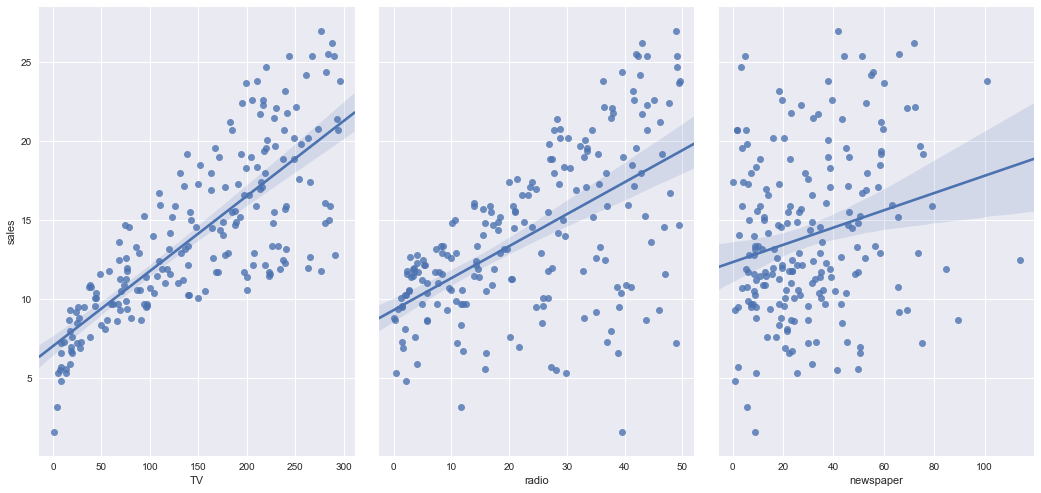

In [6]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'],y_vars='sales', size=7, aspect=0.7, kind='reg')

In [8]:
feature_cols = ['TV', 'radio', 'newspaper']

x = data[feature_cols]

x = data[['TV', 'radio', 'newspaper']]

x.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [10]:
# type: dataframe or series
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [11]:
x.shape

(200, 3)

In [12]:
y = data['sales']

y = data.sales

y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [13]:
print(type(y))

<class 'pandas.core.series.Series'>


In [14]:
y.shape

(200,)

In [15]:
print(y.shape)

(200,)


In [16]:
from sklearn.cross_validation import train_test_split

x_train, X_test, y_train, y_test  = train_test_split(x, y, random_state=1)

C:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
print(x_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(150, 3)
(150,)
(50, 3)
(50,)


In [20]:
from sklearn.linear_model import LinearRegression 

linreg = LinearRegression()

linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [22]:
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046564567874150288),
 ('radio', 0.17915812245088836),
 ('newspaper', 0.0034504647111803788)]

In [23]:
y_pred = linreg.predict(X_test)

In [24]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 20]

In [25]:
print((10 + 0 + 20 +10)/4)

10.0


In [26]:
from sklearn import metrics

print(metrics.mean_absolute_error(true, pred))

7.5


In [28]:
import numpy as np

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


In [30]:
feature_cols = ['TV', 'radio']

x = data[feature_cols]

y = data.sales

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

linreg.fit(x_train, y_train)

y_pred = linreg.predict(x_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994
